In [11]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm
from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
import random

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

In [2]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/python_out/'

In [3]:
#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
    omc_countN = pickle.load(f)

    #### load data
with open(in_path +'M194_M220_ACA_bin4.pkl', 'rb') as f:
    aca_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_ACA_countN4.pkl', 'rb') as f:
    aca_countN = pickle.load(f)

# Heatmaps - using Ncount data

In [4]:
# initial processing
# bin processing
omc_clean = [clean_up_data(df) for df in omc_bin]
omc_type = [sort_by_celltype(df) for df in omc_clean]
omc_preprocess = dfs_preprocess_counts(omc_type) # normalize by dataset median

# countN processing
omc_cleanN = [clean_up_data(df) for df in omc_countN]
omc_typeN = [sort_by_celltype(df) for df in omc_cleanN]
omc_preprocessN = dfs_preprocess_counts(omc_typeN) # normalize by dataset median



## individual animal

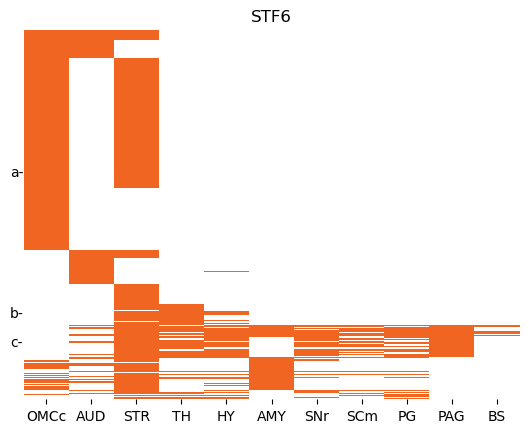

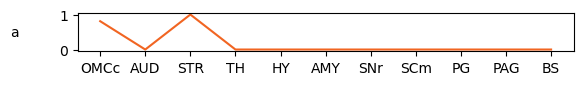

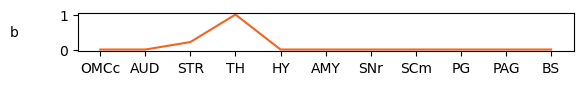

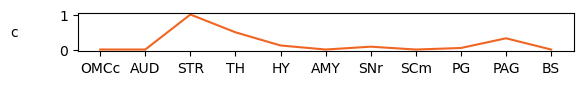

In [7]:
# plot STF6 only, mice[10]
i=10
sort_order = ["type", 'OMCc', 'AUD', 'STR', 'TH', 'HY', 'AMY', 'SNr', 'SCm', 'PG', 'PAG',
       'BS']
neurons = {"a":400, "b":800, "c":884}
sorted_heatmap(omc_preprocess[i], sort_by=[], title=mice[i], drop=["OMCi", "type"],
               label_neurons=neurons)
plt.show()

# for key in neurons.keys():
#        single_neuron_heatmap(omc_preprocess[i], neurons[key], label=key, sort_by=[])
#        plt.show()

for key in neurons.keys():
       single_neuron_line(omc_preprocessN[i], neurons[key], label=key, sort_by=[])
       plt.show()

## n=1000 species summary

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


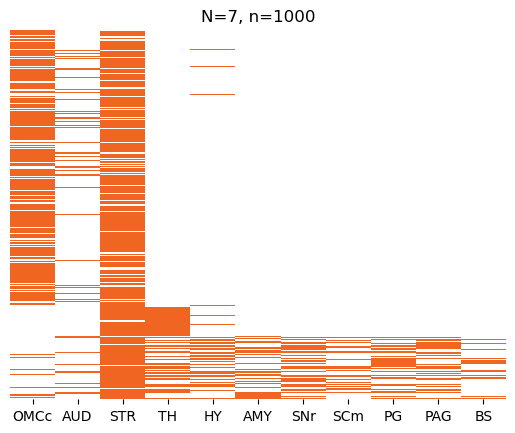

In [8]:
# plot STF6 only
stidx = [i for i in range(len(species)) if species[i]=="STeg"]
omc_st = np.take(omc_preprocess, stidx) # just get steg from list
plot_st = pd.concat(omc_st)
sorted_heatmap(plot_st, sort_by=['type'], title="N=7, n=1000", drop=["OMCi", "type"],
               nsample=1000)
plt.show()

# umap/clustering???

# Polar plots